## Epileptic Seizure Binary (Normal & Seizure States ) Classification 
### KNN Classifier

In [1]:
import numpy as np
import pandas as pd
import random
import csv

import matplotlib.pylab as plt
import seaborn as sns
sns.despine()

from sklearn.model_selection import StratifiedKFold, train_test_split, RandomizedSearchCV, cross_val_score, \
                                    cross_validate, GridSearchCV

from sklearn.metrics import make_scorer
from imblearn.metrics import specificity_score, classification_report_imbalanced, \
                                sensitivity_specificity_support, sensitivity_score, \
                                geometric_mean_score

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, confusion_matrix, roc_curve, auc, \
            classification_report, recall_score, precision_recall_curve, roc_auc_score, \
            precision_score, accuracy_score

from sklearn.neighbors import KNeighborsClassifier

# Define random state
random_state = 2018
np.random.seed(random_state)

### 1. chb01 completed

In [3]:
lebaledCSVFilePath = '/home/mirwais/notebooks/paper_3/data/lebaled/chb01_time_freq_segments.csv'
df = pd.read_csv(lebaledCSVFilePath)
df.columns.size

44

In [4]:
df["sz"].value_counts()

0    284533
2      5267
Name: sz, dtype: int64

In [5]:
# With F1 Score
x = df.drop(['sz','recordingID','Unnamed: 0','time','delta_data', 'theta_data', 'alpha_data', 'beta_data'], axis=1)
#x = featuresUnstack.drop(['sz'], axis=1)
y = df['sz']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=random_state)

#dissimilar scales of data, StandardScaler should be used
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)
cv = StratifiedKFold(n_splits = 10, shuffle=True, random_state = random_state)

clf = KNeighborsClassifier(metric='minkowski', p=2)

params = {'n_neighbors': list(range(5,6))
         } 

grid_sclf = GridSearchCV(estimator = clf, param_grid = params, cv = cv, n_jobs=-1, scoring='f1_weighted', verbose=4)
grid_sclf.fit(x_train_std, y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV] n_neighbors=5 ...................................................
[CV] n_neighbors=5 ...................................................
[CV] n_neighbors=5 ...................................................
[CV] n_neighbors=5 ...................................................
[CV] n_neighbors=5 ...................................................
[CV] n_neighbors=5 ...................................................
[CV] n_neighbors=5 ...................................................
[CV] n_neighbors=5 ...................................................
[CV] .......... n_neighbors=5, score=0.9824075005538873, total=12.1min
[CV] n_neighbors=5 ...................................................
[CV] .......... n_neighbors=5, score=0.9813686401326174, total=12.1min
[CV] n_neighbors=5 ...................................................
[CV] .......... n_neighbors=5, score=0.9804446000381092, total=12.1min
[CV] .......... 

[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed: 117.7min remaining: 176.5min


[CV] .......... n_neighbors=5, score=0.9812099907725073, total=12.3min
[CV] .......... n_neighbors=5, score=0.9815181653065247, total=12.0min
[CV] .......... n_neighbors=5, score=0.9798668252667271, total=12.2min


[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed: 118.2min remaining: 50.6min


[CV] .......... n_neighbors=5, score=0.9816290831297418, total=12.3min
[CV] .......... n_neighbors=5, score=0.9807586751251578, total= 8.9min
[CV] .......... n_neighbors=5, score=0.9820801035712184, total= 8.8min


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 201.0min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 201.0min finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=2018, shuffle=True),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [5]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='f1_weighted',
       verbose=4)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
{'n_neighbors': 5}
...................................................................


Accuracy of KNN Model: 0.9838739360478491


                   pre       rec       spe        f1       geo       iba       sup

     Normal     0.9876    0.9961    0.3260    0.9918    0.7750    0.6235     85354
Pre-seizure     0.6082    0.3260    0.9961    0.4245    0.7750    0.5779      1586

avg / total     0.9807    0.9839    0.3382    0.9815    0.7750    0.6226     86940

....................................................................


sensitivity_specificity None: (array([0.9960986, 0.3259773]), array([0.3259773, 0.9960986]), array([85354,  1586]))
sensitivity_specificity micro: (0.9838739360478491, 0.9838739360478491, None)
sensitivity_specificity macro: (0.6610379512535893, 0.6610379512535893, None)
sensitivity_specificity w

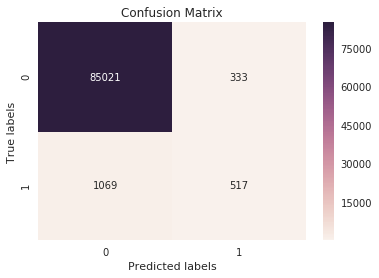

In [8]:
print(grid_sclf.best_estimator_)
print(grid_sclf.best_params_)
print('...................................................................\n\n')

#Prediction
y_predict = grid_sclf.predict(x_test_std)

print('Accuracy of KNN Model: {}\n\n' .format((accuracy_score(y_test,y_predict))))

#generate and plot confusion matrix
dsvm_cm = confusion_matrix(y_test,y_predict)

ax= sns.heatmap(dsvm_cm, annot=True, fmt="d")
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

#Classification Report 
target_names = ['Normal', 'Pre-seizure', 'Seizure']

#print(classification_report(y_test, y_predict, digits=4, target_names=target_names))
print(classification_report_imbalanced(y_test, y_predict, target_names=target_names, digits=4))

print('....................................................................\n\n')

#micro recall, precesion, specificity
for i in [None, 'micro', 'macro', 'weighted']:
    print('sensitivity_specificity {}: {}'.format(i, sensitivity_specificity_support(y_test, y_predict, average=i)))
print('\n')
for i in [None, 'micro', 'macro', 'weighted']:
    print('\ngemetric mean {}: {}'.format(i ,geometric_mean_score(y_test, y_predict, average=i)))
print('\n')
for i in [None, 'micro', 'macro', 'weighted']:
    print('\n\nF1 {}: {}'.format(i, f1_score(y_test, y_predict, average=i)))
print('\n')
for i in [None, 'micro', 'macro', 'weighted']:
    print('\n\nprecision {}: {}'.format(i,precision_score(y_test, y_predict, average='micro')))
print('\n')
for i in [None, 'micro', 'macro', 'weighted']:
    print('\n\nrecall {}: {}'.format(i, recall_score(y_test, y_predict, average='micro')))

In [97]:
# Feature selection using anova F score and p score values

def select_kbest_clf(data_frame, target, k):
    """
    Selecting K-Best features for classification
    :param data_frame: A pandas dataFrame with the training data
    :param target: target variable name in DataFrame
    :param k: desired number of features from the data
    :returns feature_scores: scores for each feature in the data as 
    pandas DataFrame
    """
    feat_selector = SelectKBest(f_classif, k=k)
    _ = feat_selector.fit(data_frame.drop(target, axis=1), data_frame[target])
    
    feat_scores = pd.DataFrame()
    feat_scores["F Score"] = feat_selector.scores_
    feat_scores["P Value"] = feat_selector.pvalues_
    feat_scores["Support"] = feat_selector.get_support()
    feat_scores["Attribute"] = data_frame.drop(target, axis=1).columns
    
    return feat_scores

features = df.drop(['recordingID','Unnamed: 0','time'], axis=1)

res = pd.DataFrame(select_kbest_clf(features, 'sz', 40))
f = res.loc[res['Support'] != True]
a=[]
for i in f['Attribute']:
    a.append(i)


In [98]:
print(res)

         F Score        P Value  Support       Attribute
0   22496.859045   0.000000e+00     True            mean
1   17484.859588   0.000000e+00     True             std
2   20833.153076   0.000000e+00     True             rms
3     137.407171   9.986568e-32     True        kurtosis
4     234.653917   6.042790e-53     True             cov
5     217.144907   3.953569e-49     True        skewness
6   19268.038418   0.000000e+00     True      delta_mean
7   19630.675687   0.000000e+00     True      theta_mean
8    2711.551685   0.000000e+00     True      alpha_mean
9    2585.783686   0.000000e+00     True       beta_mean
10  23493.236092   0.000000e+00     True        all_mean
11  14782.207409   0.000000e+00     True       delta_std
12  16979.859030   0.000000e+00     True       theta_std
13   2480.501002   0.000000e+00     True       alpha_std
14    140.303630   2.324315e-32     True        beta_std
15  18747.155690   0.000000e+00     True         all_std
16     22.871652   1.732722e-06

In [91]:
# Apply KNN after ANOVA Test

x = df.drop(['sz','recordingID','Unnamed: 0','time'], axis=1)
x = x.drop(a, axis=1)
y = df['sz']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=random_state)

#dissimilar scales of data, StandardScaler should be used
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)
cv = StratifiedKFold(n_splits = 10, shuffle=True, random_state = random_state)

clf = KNeighborsClassifier(metric='minkowski', p=2)

params = {'n_neighbors': list(range(1,6))
         } 

grid_sclf = GridSearchCV(estimator = clf, param_grid = params, cv = cv, n_jobs=-1, scoring='f1_macro', verbose=4)
grid_sclf.fit(x_train_std, y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] n_neighbors=1 ...................................................
[CV] n_neighbors=1 ...................................................
[CV] n_neighbors=1 ...................................................
[CV] n_neighbors=1 ...................................................
[CV] n_neighbors=1 ...................................................
[CV] n_neighbors=1 ...................................................
[CV] n_neighbors=1 ...................................................
[CV] n_neighbors=1 ...................................................
[CV] .......... n_neighbors=1, score=0.7036665796482796, total=  37.2s
[CV] n_neighbors=1 ...................................................
[CV] .......... n_neighbors=1, score=0.6909583238778082, total=  37.8s
[CV] n_neighbors=1 ...................................................
[CV] .......... n_neighbors=1, score=0.7095409794287972, total=  37.4s
[CV] .......... 

[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.5min


[CV] .......... n_neighbors=1, score=0.7143153684499287, total=  35.1s
[CV] n_neighbors=2 ...................................................
[CV] .......... n_neighbors=2, score=0.6675704015794893, total=  47.3s
[CV] n_neighbors=2 ...................................................
[CV] .......... n_neighbors=2, score=0.6553915530785056, total=  50.3s
[CV] n_neighbors=2 ...................................................
[CV] ........... n_neighbors=2, score=0.662817722926957, total=  51.1s
[CV] n_neighbors=3 ...................................................
[CV] ............ n_neighbors=2, score=0.65247323980097, total=  49.5s
[CV] n_neighbors=3 ...................................................
[CV] .......... n_neighbors=2, score=0.6614110362788366, total=  49.6s
[CV] n_neighbors=3 ...................................................
[CV] .......... n_neighbors=2, score=0.6632215323144091, total=  51.0s
[CV] n_neighbors=3 ...................................................
[CV] .

[Parallel(n_jobs=-1)]: Done  48 out of  50 | elapsed: 42.1min remaining:  1.8min


[CV] .......... n_neighbors=5, score=0.6667287892681822, total= 1.0min
[CV] .......... n_neighbors=5, score=0.7327337656337477, total=  59.5s


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 43.1min finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=2018, shuffle=True),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_macro', verbose=4)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
{'n_neighbors': 5}
...................................................................


Accuracy of KNN Model: 0.9832528180354267


                   pre       rec       spe        f1       geo       iba       sup

     Normal     0.9875    0.9955    0.3235    0.9915    0.7519    0.5889     85354
Pre-seizure     0.5725    0.3235    0.9955    0.4134    0.7519    0.5419      1586

avg / total     0.9800    0.9833    0.3357    0.9810    0.7519    0.5880     86940

....................................................................


sensitivity_specificity None: (array([0.99551281, 0.32345523]), array([0.32345523, 0.99551281]), array([85354,  1586]))
sensitivity_specificity micro: (0.9832528180354267, 0.9832528180354267, None)
sensitivity_specificity macro: (0.6594840193918594, 0.6594840193918594, None)
sensitivity_specifici

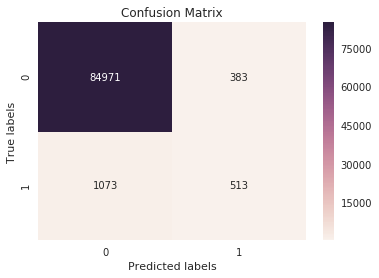

In [92]:
print(grid_sclf.best_estimator_)
print(grid_sclf.best_params_)
print('...................................................................\n\n')

#Prediction
y_predict = grid_sclf.predict(x_test_std)

print('Accuracy of KNN Model: {}\n\n' .format((accuracy_score(y_test,y_predict))))

#generate and plot confusion matrix
dsvm_cm = confusion_matrix(y_test,y_predict)

ax= sns.heatmap(dsvm_cm, annot=True, fmt="d")
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

#Classification Report 
target_names = ['Normal', 'Pre-seizure', 'Seizure']

#print(classification_report(y_test, y_predict, digits=4, target_names=target_names))
print(classification_report_imbalanced(y_test, y_predict, target_names=target_names, digits=4))

print('....................................................................\n\n')

#micro recall, precesion, specificity
for i in [None, 'micro', 'macro', 'weighted']:
    print('sensitivity_specificity {}: {}'.format(i, sensitivity_specificity_support(y_test, y_predict, average=i)))
print('\n')
for i in [None, 'micro', 'macro', 'weighted']:
    print('\ngemetric mean {}: {}'.format(i ,geometric_mean_score(y_test, y_predict, average=i)))
print('\n')
for i in [None, 'micro', 'macro', 'weighted']:
    print('\n\nF1 {}: {}'.format(i, f1_score(y_test, y_predict, average=i)))
print('\n')
for i in [None, 'micro', 'macro', 'weighted']:
    print('\n\nprecision {}: {}'.format(i,precision_score(y_test, y_predict, average='micro')))
print('\n')
for i in [None, 'micro', 'macro', 'weighted']:
    print('\n\nrecall {}: {}'.format(i, recall_score(y_test, y_predict, average='micro')))

In [6]:
finalDf.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,index,sz
0,-2.744205,-0.746953,5.603104,2.995515,-1.412850,4.336597,4.650138,-0.050424,-0.297367,-1.604631,...,0.186109,0.858063,-0.205713,-5.227849,-4.862005,0.027308,-0.295263,-0.000031,0,0
1,-2.471188,0.275462,9.147368,-1.397674,-1.956122,1.040428,2.965467,2.129859,0.385901,-0.166485,...,0.659045,0.051311,-0.048404,-2.754876,0.141165,-0.153224,0.445115,0.505123,1,0
2,-2.284085,-1.384750,2.596187,-0.117649,-1.146322,0.594319,-0.898110,1.583014,-1.524657,0.314412,...,-0.679381,0.074218,0.456622,-1.344410,0.187787,-0.212919,0.150613,0.043600,2,0
3,-2.287461,-1.634864,1.832991,-0.525374,0.394799,-0.023698,0.280990,1.251438,-1.342037,0.733970,...,-0.369783,-0.035517,0.152765,0.314785,-0.605212,0.063014,0.172210,-0.012549,3,0
4,-2.485583,0.211655,7.496917,-1.339822,-3.050006,0.761526,3.249200,1.927825,0.192421,-1.036545,...,1.771516,-0.007587,-0.524679,-1.625275,0.976335,-0.402456,-0.014346,0.159161,4,0


In [7]:
# With F1 Score
x = finalDf.drop(['sz','index'], axis=1)
#x = featuresUnstack.drop(['sz'], axis=1)
y = finalDf['sz']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=random_state)

#dissimilar scales of data, StandardScaler should be used
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)
cv = StratifiedKFold(n_splits = 10, shuffle=True, random_state = random_state)

clf = KNeighborsClassifier(metric='minkowski', p=2)

params = {'n_neighbors': list(range(1,3))
         } 

grid_sclf = GridSearchCV(estimator = clf, param_grid = params, cv = cv, n_jobs=-1, scoring='f1_weighted', verbose=4)
grid_sclf.fit(x_train_std, y_train)

Fitting 10 folds for each of 2 candidates, totalling 20 fits
[CV] n_neighbors=1 ...................................................
[CV] n_neighbors=1 ...................................................
[CV] n_neighbors=1 ...................................................
[CV] n_neighbors=1 ...................................................
[CV] n_neighbors=1 ...................................................
[CV] n_neighbors=1 ...................................................
[CV] n_neighbors=1 ...................................................
[CV] n_neighbors=1 ...................................................
[CV] .......... n_neighbors=1, score=0.9370602563134325, total= 3.9min
[CV] n_neighbors=1 ...................................................
[CV] ............ n_neighbors=1, score=0.93717195590115, total= 3.9min
[CV] n_neighbors=1 ...................................................
[CV] .......... n_neighbors=1, score=0.9367790998846579, total= 3.9min
[CV] n_neighbors

[Parallel(n_jobs=-1)]: Done  11 out of  20 | elapsed: 44.0min remaining: 36.0min


[CV] ........... n_neighbors=2, score=0.942731829821183, total= 5.0min
[CV] n_neighbors=2 ...................................................
[CV] .......... n_neighbors=2, score=0.9430199824278285, total= 5.0min
[CV] .......... n_neighbors=2, score=0.9423825904783235, total= 4.9min
[CV] .......... n_neighbors=2, score=0.9433189151974732, total= 5.0min
[CV] .......... n_neighbors=2, score=0.9439990378067029, total= 5.3min
[CV] ........... n_neighbors=2, score=0.941965207352178, total= 5.0min


[Parallel(n_jobs=-1)]: Done  17 out of  20 | elapsed: 47.4min remaining:  8.4min


[CV] .......... n_neighbors=2, score=0.9427260413804089, total= 5.0min
[CV] .......... n_neighbors=2, score=0.9431542251416487, total= 3.6min
[CV] .......... n_neighbors=2, score=0.9432065395828049, total= 3.7min


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 67.9min finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=2018, shuffle=True),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [1, 2]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='f1_weighted',
       verbose=4)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')
{'n_neighbors': 2}
...................................................................


Accuracy of KNN Model: 0.9581090407177364


                   pre       rec       spe        f1       geo       iba       sup

     Normal     0.9615    0.9963    0.0626    0.9786    0.6364    0.4269     83395
Pre-seizure     0.1215    0.0112    0.9981    0.0206    0.3447    0.1087      1959
    Seizure     0.5376    0.1173    0.9981    0.1925    0.7272    0.5053      1586

avg / total     0.9349    0.9581    0.1008    0.9427    0.6315    0.4212     86940

....................................................................


sensitivity_specificity None: (array([0.99634271, 0.01123022, 0.11727617]), array([0.06262341, 0.99812899, 0.99812545]), array([83395,  1959,  1586]))
sensitivity_specificity micro: (0.9581090407177364, 0.979054520

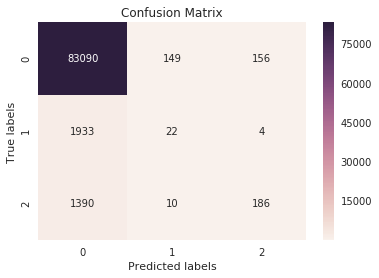

In [8]:
print(grid_sclf.best_estimator_)
print(grid_sclf.best_params_)
print('...................................................................\n\n')

#Prediction
y_predict = grid_sclf.predict(x_test_std)

print('Accuracy of KNN Model: {}\n\n' .format((accuracy_score(y_test,y_predict))))

#generate and plot confusion matrix
dsvm_cm = confusion_matrix(y_test,y_predict)

ax= sns.heatmap(dsvm_cm, annot=True, fmt="d")
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

#Classification Report 
target_names = ['Normal', 'Pre-seizure', 'Seizure']

#print(classification_report(y_test, y_predict, digits=4, target_names=target_names))
print(classification_report_imbalanced(y_test, y_predict, target_names=target_names, digits=4))

print('....................................................................\n\n')

#micro recall, precesion, specificity
for i in [None, 'micro', 'macro', 'weighted']:
    print('sensitivity_specificity {}: {}'.format(i, sensitivity_specificity_support(y_test, y_predict, average=i)))
print('\n')
for i in [None, 'micro', 'macro', 'weighted']:
    print('\ngemetric mean {}: {}'.format(i ,geometric_mean_score(y_test, y_predict, average=i)))
print('\n')
for i in [None, 'micro', 'macro', 'weighted']:
    print('\n\nF1 {}: {}'.format(i, f1_score(y_test, y_predict, average=i)))
print('\n')
for i in [None, 'micro', 'macro', 'weighted']:
    print('\n\nprecision {}: {}'.format(i,precision_score(y_test, y_predict, average='micro')))
print('\n')
for i in [None, 'micro', 'macro', 'weighted']:
    print('\n\nrecall {}: {}'.format(i, recall_score(y_test, y_predict, average='micro')))

In [2]:
# Binary Classification
lebaledCSVFile = '/home/mirwais/notebooks/paper_2/data/lebaled/chb01_time_freq_segments.csv'
df = pd.read_csv(lebaledCSVFile)
df.columns.size

54

In [3]:
df["sz"].value_counts()

0    284533
2      5267
Name: sz, dtype: int64

In [4]:
# With F1 Score
x = df.drop(['sz','recordingID','Unnamed: 0','recordingID.1','time'], axis=1)
#x = featuresUnstack.drop(['sz'], axis=1)
y = df['sz']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=random_state)

#dissimilar scales of data, StandardScaler should be used
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)
cv = StratifiedKFold(n_splits = 10, shuffle=True, random_state = random_state)

clf = KNeighborsClassifier(metric='minkowski', p=2)

params = {'n_neighbors': list(range(1,3))
         } 

grid_sclf = GridSearchCV(estimator = clf, param_grid = params, cv = cv, n_jobs=-1, scoring='f1_weighted', verbose=4)
grid_sclf.fit(x_train_std, y_train)

Fitting 10 folds for each of 2 candidates, totalling 20 fits
[CV] n_neighbors=1 ...................................................
[CV] n_neighbors=1 ...................................................
[CV] n_neighbors=1 ...................................................
[CV] n_neighbors=1 ...................................................
[CV] n_neighbors=1 ...................................................
[CV] n_neighbors=1 ...................................................
[CV] n_neighbors=1 ...................................................
[CV] n_neighbors=1 ...................................................
[CV] .......... n_neighbors=1, score=0.9751815730175569, total= 6.8min
[CV] n_neighbors=1 ...................................................
[CV] .......... n_neighbors=1, score=0.9759460527316053, total= 6.8min
[CV] n_neighbors=1 ...................................................
[CV] .......... n_neighbors=1, score=0.9757406012164096, total= 6.6min
[CV] n_neighbors

[Parallel(n_jobs=-1)]: Done  11 out of  20 | elapsed: 90.7min remaining: 74.2min


[CV] .......... n_neighbors=2, score=0.9774149293957806, total= 8.0min
[CV] n_neighbors=2 ...................................................
[CV] .......... n_neighbors=2, score=0.9755875348716488, total= 8.0min
[CV] .......... n_neighbors=2, score=0.9766402487779722, total= 8.0min
[CV] .......... n_neighbors=2, score=0.9767441680035666, total= 8.0min
[CV] .......... n_neighbors=2, score=0.9766695082647642, total= 7.7min
[CV] .......... n_neighbors=2, score=0.9760000605315835, total= 7.9min


[Parallel(n_jobs=-1)]: Done  17 out of  20 | elapsed: 105.4min remaining: 18.6min


[CV] .......... n_neighbors=2, score=0.9765795566586936, total= 8.0min
[CV] .......... n_neighbors=2, score=0.9773058376725493, total= 5.6min
[CV] .......... n_neighbors=2, score=0.9768672996537753, total= 5.9min


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 134.0min finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=2018, shuffle=True),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [1, 2]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='f1_weighted',
       verbose=4)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')
{'n_neighbors': 2}
...................................................................


Accuracy of KNN Model: 0.9817920404876926


                   pre       rec       spe        f1       geo       iba       sup

     Normal     0.9841    0.9976    0.1330    0.9908    0.7040    0.5194     85354
Pre-seizure     0.5036    0.1330    0.9976    0.2105    0.7040    0.4718      1586

avg / total     0.9753    0.9818    0.1488    0.9766    0.7040    0.5185     86940

....................................................................


sensitivity_specificity None: (array([0.99756309, 0.13303909]), array([0.13303909, 0.99756309]), array([85354,  1586]))
sensitivity_specificity micro: (0.9817920404876926, 0.9817920404876926, None)
sensitivity_specificity macro: (0.5653010911222902, 0.5653010911222902, None)
sensitivity_specifici

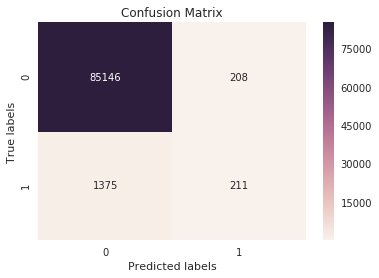

In [5]:
print(grid_sclf.best_estimator_)
print(grid_sclf.best_params_)
print('...................................................................\n\n')

#Prediction
y_predict = grid_sclf.predict(x_test_std)

print('Accuracy of KNN Model: {}\n\n' .format((accuracy_score(y_test,y_predict))))

#generate and plot confusion matrix
dsvm_cm = confusion_matrix(y_test,y_predict)

ax= sns.heatmap(dsvm_cm, annot=True, fmt="d")
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

#Classification Report 
target_names = ['Normal', 'Pre-seizure', 'Seizure']

#print(classification_report(y_test, y_predict, digits=4, target_names=target_names))
print(classification_report_imbalanced(y_test, y_predict, target_names=target_names, digits=4))

print('....................................................................\n\n')

#micro recall, precesion, specificity
for i in [None, 'micro', 'macro', 'weighted']:
    print('sensitivity_specificity {}: {}'.format(i, sensitivity_specificity_support(y_test, y_predict, average=i)))
print('\n')
for i in [None, 'micro', 'macro', 'weighted']:
    print('\ngemetric mean {}: {}'.format(i ,geometric_mean_score(y_test, y_predict, average=i)))
print('\n')
for i in [None, 'micro', 'macro', 'weighted']:
    print('\n\nF1 {}: {}'.format(i, f1_score(y_test, y_predict, average=i)))
print('\n')
for i in [None, 'micro', 'macro', 'weighted']:
    print('\n\nprecision {}: {}'.format(i,precision_score(y_test, y_predict, average='micro')))
print('\n')
for i in [None, 'micro', 'macro', 'weighted']:
    print('\n\nrecall {}: {}'.format(i, recall_score(y_test, y_predict, average='micro')))

In [7]:
# Filtered data b/w 4-40hz
lebaledCSVFile = '/home/mirwais/notebooks/paper_2/data/lebaled/chb01_time_freq_segments2.csv'
df = pd.read_csv(lebaledCSVFile)
df.columns.size

54

In [8]:
df["sz"].value_counts()

0    284533
2      5267
Name: sz, dtype: int64

In [9]:
# With F1 Score
x = df.drop(['sz','recordingID','Unnamed: 0','recordingID.1','time'], axis=1)
#x = featuresUnstack.drop(['sz'], axis=1)
y = df['sz']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=random_state)

#dissimilar scales of data, StandardScaler should be used
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)
cv = StratifiedKFold(n_splits = 10, shuffle=True, random_state = random_state)

clf = KNeighborsClassifier(metric='minkowski', p=2)

params = {'n_neighbors': list(range(4,8))
         } 

grid_sclf = GridSearchCV(estimator = clf, param_grid = params, cv = cv, n_jobs=-1, scoring='f1_weighted', verbose=4)
grid_sclf.fit(x_train_std, y_train)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
[CV] n_neighbors=4 ...................................................
[CV] n_neighbors=4 ...................................................
[CV] n_neighbors=4 ...................................................
[CV] n_neighbors=4 ...................................................
[CV] n_neighbors=4 ...................................................
[CV] n_neighbors=4 ...................................................
[CV] n_neighbors=4 ...................................................
[CV] n_neighbors=4 ...................................................
[CV] .......... n_neighbors=4, score=0.9784465383810494, total= 1.1min
[CV] n_neighbors=4 ...................................................
[CV] .......... n_neighbors=4, score=0.9773922021024982, total= 1.7min
[CV] n_neighbors=4 ...................................................
[CV] .......... n_neighbors=4, score=0.9789279360906085, total= 1.6min
[CV] n_neighbors

[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 24.8min


[CV] .......... n_neighbors=5, score=0.9787679146711334, total= 1.2min
[CV] n_neighbors=5 ...................................................
[CV] ........... n_neighbors=4, score=0.978947293001231, total= 1.6min
[CV] n_neighbors=5 ...................................................
[CV] .......... n_neighbors=5, score=0.9792780443157878, total= 1.7min
[CV] n_neighbors=5 ...................................................
[CV] .......... n_neighbors=5, score=0.9787578032449771, total= 1.7min
[CV] n_neighbors=6 ...................................................
[CV] .......... n_neighbors=5, score=0.9796212680730547, total= 1.7min
[CV] n_neighbors=6 ...................................................
[CV] ........... n_neighbors=5, score=0.979437668395367, total= 1.7min
[CV] n_neighbors=6 ...................................................
[CV] ........... n_neighbors=5, score=0.978462817953732, total= 1.7min
[CV] n_neighbors=6 ...................................................
[CV] .

[Parallel(n_jobs=-1)]: Done  36 out of  40 | elapsed: 77.9min remaining:  8.7min


[CV] .......... n_neighbors=7, score=0.9804729020002687, total= 1.9min
[CV] .......... n_neighbors=7, score=0.9798231004264135, total= 1.8min
[CV] .......... n_neighbors=7, score=0.9781507595543009, total= 1.8min
[CV] .......... n_neighbors=7, score=0.9806722839544565, total= 1.8min


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 81.1min finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=2018, shuffle=True),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [4, 5, 6, 7]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='f1_weighted',
       verbose=4)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
{'n_neighbors': 5}
...................................................................


Accuracy of KNN Model: 0.9827007131354958


                   pre       rec       spe        f1       geo       iba       sup

     Normal     0.9864    0.9961    0.2598    0.9912    0.7401    0.5713     85354
Pre-seizure     0.5553    0.2598    0.9961    0.3540    0.7401    0.5241      1586

avg / total     0.9785    0.9827    0.2732    0.9796    0.7401    0.5704     86940

....................................................................


sensitivity_specificity None: (array([0.99613375, 0.25977301]), array([0.25977301, 0.99613375]), array([85354,  1586]))
sensitivity_specificity micro: (0.9827007131354958, 0.9827007131354958, None)
sensitivity_specificity macro: (0.6279533813645366, 0.6279533813645366, None)
sensitivity_specifici

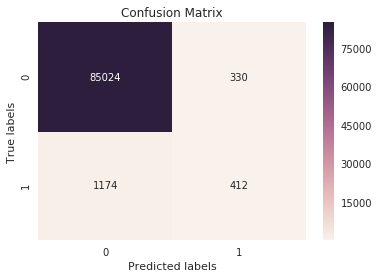

In [10]:
print(grid_sclf.best_estimator_)
print(grid_sclf.best_params_)
print('...................................................................\n\n')

#Prediction
y_predict = grid_sclf.predict(x_test_std)

print('Accuracy of KNN Model: {}\n\n' .format((accuracy_score(y_test,y_predict))))

#generate and plot confusion matrix
dsvm_cm = confusion_matrix(y_test,y_predict)

ax= sns.heatmap(dsvm_cm, annot=True, fmt="d")
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

#Classification Report 
target_names = ['Normal', 'Pre-seizure', 'Seizure']

#print(classification_report(y_test, y_predict, digits=4, target_names=target_names))
print(classification_report_imbalanced(y_test, y_predict, target_names=target_names, digits=4))

print('....................................................................\n\n')

#micro recall, precesion, specificity
for i in [None, 'micro', 'macro', 'weighted']:
    print('sensitivity_specificity {}: {}'.format(i, sensitivity_specificity_support(y_test, y_predict, average=i)))
print('\n')
for i in [None, 'micro', 'macro', 'weighted']:
    print('\ngemetric mean {}: {}'.format(i ,geometric_mean_score(y_test, y_predict, average=i)))
print('\n')
for i in [None, 'micro', 'macro', 'weighted']:
    print('\n\nF1 {}: {}'.format(i, f1_score(y_test, y_predict, average=i)))
print('\n')
for i in [None, 'micro', 'macro', 'weighted']:
    print('\n\nprecision {}: {}'.format(i,precision_score(y_test, y_predict, average='micro')))
print('\n')
for i in [None, 'micro', 'macro', 'weighted']:
    print('\n\nrecall {}: {}'.format(i, recall_score(y_test, y_predict, average='micro')))

In [3]:
# Filtered data b/w 4-30hz
lebaledCSVFile = '/home/mirwais/notebooks/paper_2/data/lebaled/chb01_time_freq_segments3.csv'
df = pd.read_csv(lebaledCSVFile)
df.columns.size

45

In [4]:
df["sz"].value_counts()

0    284533
2      5267
Name: sz, dtype: int64

In [5]:
# With F1 Score
x = df.drop(['sz','recordingID','Unnamed: 0','recordingID.1','time'], axis=1)
#x = featuresUnstack.drop(['sz'], axis=1)
y = df['sz']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=random_state)

#dissimilar scales of data, StandardScaler should be used
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)
cv = StratifiedKFold(n_splits = 10, shuffle=True, random_state = random_state)

clf = KNeighborsClassifier(metric='minkowski', p=2)

params = {'n_neighbors': list(range(3,7))
         } 

grid_sclf = GridSearchCV(estimator = clf, param_grid = params, cv = cv, n_jobs=-1, scoring='f1_weighted', verbose=4)
grid_sclf.fit(x_train_std, y_train)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
[CV] n_neighbors=3 ...................................................
[CV] n_neighbors=3 ...................................................
[CV] n_neighbors=3 ...................................................
[CV] n_neighbors=3 ...................................................
[CV] n_neighbors=3 ...................................................
[CV] n_neighbors=3 ...................................................
[CV] n_neighbors=3 ...................................................
[CV] n_neighbors=3 ...................................................
[CV] .......... n_neighbors=3, score=0.9788698475069152, total= 1.1min
[CV] n_neighbors=3 ...................................................
[CV] ........... n_neighbors=3, score=0.977875273490618, total= 1.2min
[CV] n_neighbors=3 ...................................................
[CV] .......... n_neighbors=3, score=0.9792657840204716, total= 1.2min
[CV] n_neighbors

[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 18.2min


[CV] .......... n_neighbors=3, score=0.9795030995059433, total= 1.1min
[CV] n_neighbors=4 ...................................................
[CV] .......... n_neighbors=4, score=0.9783351816005792, total= 1.1min
[CV] n_neighbors=4 ...................................................
[CV] .......... n_neighbors=4, score=0.9788618910494279, total= 1.1min
[CV] n_neighbors=4 ...................................................
[CV] .......... n_neighbors=4, score=0.9783910982165647, total= 1.2min
[CV] n_neighbors=5 ...................................................
[CV] .......... n_neighbors=4, score=0.9778609840313498, total= 1.1min
[CV] n_neighbors=5 ...................................................
[CV] .......... n_neighbors=4, score=0.9772918820202354, total= 1.2min
[CV] n_neighbors=5 ...................................................
[CV] .......... n_neighbors=4, score=0.9784615070722958, total= 1.2min
[CV] n_neighbors=5 ...................................................
[CV] .

[Parallel(n_jobs=-1)]: Done  36 out of  40 | elapsed: 51.8min remaining:  5.8min


[CV] .......... n_neighbors=6, score=0.9798572866724086, total= 1.3min
[CV] .......... n_neighbors=6, score=0.9785602283304677, total= 1.3min
[CV] .......... n_neighbors=6, score=0.9771522433253044, total= 1.2min
[CV] .......... n_neighbors=6, score=0.9789300908289922, total= 1.2min


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 53.2min finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=2018, shuffle=True),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [3, 4, 5, 6]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='f1_weighted',
       verbose=4)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
{'n_neighbors': 5}
...................................................................


Accuracy of KNN Model: 0.9824936737980217


                   pre       rec       spe        f1       geo       iba       sup

     Normal     0.9859    0.9965    0.2314    0.9911    0.7349    0.5637     85354
Pre-seizure     0.5478    0.2314    0.9965    0.3254    0.7349    0.5164      1586

avg / total     0.9779    0.9825    0.2454    0.9790    0.7349    0.5628     86940

....................................................................


sensitivity_specificity None: (array([0.99645008, 0.23139975]), array([0.23139975, 0.99645008]), array([85354,  1586]))
sensitivity_specificity micro: (0.9824936737980217, 0.9824936737980217, None)
sensitivity_specificity macro: (0.6139249131449023, 0.6139249131449023, None)
sensitivity_specifici

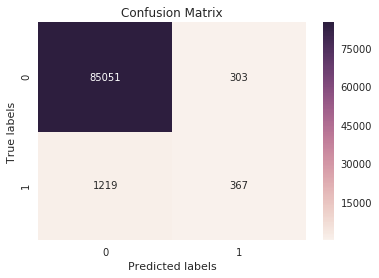

In [6]:
print(grid_sclf.best_estimator_)
print(grid_sclf.best_params_)
print('...................................................................\n\n')

#Prediction
y_predict = grid_sclf.predict(x_test_std)

print('Accuracy of KNN Model: {}\n\n' .format((accuracy_score(y_test,y_predict))))

#generate and plot confusion matrix
dsvm_cm = confusion_matrix(y_test,y_predict)

ax= sns.heatmap(dsvm_cm, annot=True, fmt="d")
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

#Classification Report 
target_names = ['Normal', 'Pre-seizure', 'Seizure']

#print(classification_report(y_test, y_predict, digits=4, target_names=target_names))
print(classification_report_imbalanced(y_test, y_predict, target_names=target_names, digits=4))

print('....................................................................\n\n')

#micro recall, precesion, specificity
for i in [None, 'micro', 'macro', 'weighted']:
    print('sensitivity_specificity {}: {}'.format(i, sensitivity_specificity_support(y_test, y_predict, average=i)))
print('\n')
for i in [None, 'micro', 'macro', 'weighted']:
    print('\ngemetric mean {}: {}'.format(i ,geometric_mean_score(y_test, y_predict, average=i)))
print('\n')
for i in [None, 'micro', 'macro', 'weighted']:
    print('\n\nF1 {}: {}'.format(i, f1_score(y_test, y_predict, average=i)))
print('\n')
for i in [None, 'micro', 'macro', 'weighted']:
    print('\n\nprecision {}: {}'.format(i,precision_score(y_test, y_predict, average='micro')))
print('\n')
for i in [None, 'micro', 'macro', 'weighted']:
    print('\n\nrecall {}: {}'.format(i, recall_score(y_test, y_predict, average='micro')))

In [4]:
#Fast RandomForestRegressor on fre_segment_5
from sklearn.ensemble import RandomForestRegressor

x = df.drop(['sz','recordingID','Unnamed: 0','time'], axis=1)
#x = featuresUnstack.drop(['sz'], axis=1)
y = df['sz']

model = RandomForestRegressor(n_estimators=10, random_state=random_state)
x=pd.get_dummies(x)
model.fit(x,y)

/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=2018, verbose=0, warm_start=False)

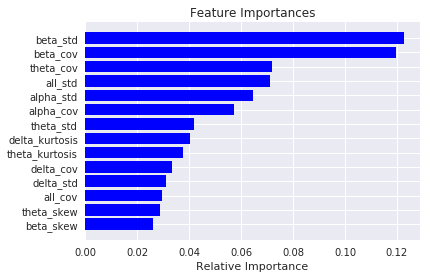

In [13]:
features = x.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-14:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [27]:
from sklearn.feature_selection import SelectFromModel
feature = SelectFromModel(model, threshold=1e-5)
Fit = feature.fit_transform(x, y)

In [28]:
Fit2 = pd.DataFrame(Fit)

In [31]:
Fit2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.327113e+07,1.006542e+07,9.872707e+06,4.401273e+05,170289.780746,0.711449,0.711438,0.711460,0.719180,0.710974,-1.131106,-1.131129,0.340805
1,2.562614e+07,1.943593e+07,1.906381e+07,8.505944e+05,328754.280919,0.300767,0.300765,0.300772,0.304362,0.300694,-1.174348,-1.174366,0.187851
2,3.608718e+07,2.736995e+07,2.684564e+07,1.194543e+06,462895.474957,0.187201,0.187200,0.187202,0.188938,0.187165,-1.212251,-1.212265,0.075651
3,4.805867e+07,3.644967e+07,3.575129e+07,1.587570e+06,616488.998224,0.143363,0.143362,0.143363,0.144402,0.143353,-1.200643,-1.200656,0.117796
4,6.282185e+07,4.764666e+07,4.673341e+07,2.064801e+06,805795.349778,0.118763,0.118762,0.118762,0.119022,0.118748,-1.198899,-1.198903,0.042068


In [30]:
df.shape

(667800, 39)

In [32]:
# With F1 Score
x = Fit2
#x = featuresUnstack.drop(['sz'], axis=1)
y = df['sz']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=random_state)

#dissimilar scales of data, StandardScaler should be used
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)
cv = StratifiedKFold(n_splits = 10, shuffle=True, random_state = random_state)

clf = KNeighborsClassifier(metric='minkowski', p=2)

params = {'n_neighbors': list(range(1,3))
         } 

grid_sclf = GridSearchCV(estimator = clf, param_grid = params, cv = cv, n_jobs=-1, scoring='f1_weighted', verbose=4)
grid_sclf.fit(x_train_std, y_train)

Fitting 10 folds for each of 2 candidates, totalling 20 fits
[CV] n_neighbors=1 ...................................................
[CV] n_neighbors=1 ...................................................
[CV] n_neighbors=1 ...................................................
[CV] n_neighbors=1 ...................................................
[CV] n_neighbors=1 ...................................................
[CV] n_neighbors=1 ...................................................
[CV] n_neighbors=1 ...................................................
[CV] n_neighbors=1 ...................................................
[CV] .......... n_neighbors=1, score=0.9956778750912536, total=   6.6s
[CV] n_neighbors=1 ...................................................
[CV] .......... n_neighbors=1, score=0.9948767574275688, total=   7.3s
[CV] n_neighbors=1 ...................................................
[CV] .......... n_neighbors=1, score=0.9949690311570173, total=   6.5s
[CV] .......... 

[Parallel(n_jobs=-1)]: Done  11 out of  20 | elapsed:   54.9s remaining:   44.9s


[CV] .......... n_neighbors=2, score=0.9940797559511788, total=   7.9s
[CV] n_neighbors=2 ...................................................
[CV] ........... n_neighbors=2, score=0.994204194113016, total=   6.8s
[CV] ........... n_neighbors=2, score=0.994150614874757, total=   7.2s
[CV] .......... n_neighbors=2, score=0.9932105825412354, total=   7.6s
[CV] .......... n_neighbors=2, score=0.9936757325570531, total=   8.6s
[CV] .......... n_neighbors=2, score=0.9942000543758431, total=   6.7s


[Parallel(n_jobs=-1)]: Done  17 out of  20 | elapsed:  1.1min remaining:   12.0s


[CV] .......... n_neighbors=2, score=0.9945844095210109, total=   7.0s
[CV] .......... n_neighbors=2, score=0.9937885052464493, total=   5.9s
[CV] .......... n_neighbors=2, score=0.9942272139493163, total=   6.3s


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.3min finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=2018, shuffle=True),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [1, 2]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='f1_weighted',
       verbose=4)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')
{'n_neighbors': 1}
...................................................................


Accuracy of KNN Model: 0.9955775182190276


                   pre       rec       spe        f1       geo       iba       sup

     Normal     0.9978    0.9982    0.9489    0.9980    0.9780    0.9603    192106
Pre-seizure     0.9499    0.9528    0.9988    0.9514    0.9741    0.9442      4600
    Seizure     0.9338    0.9086    0.9988    0.9211    0.9655    0.9262      3634

avg / total     0.9955    0.9956    0.9509    0.9956    0.9777    0.9593    200340

....................................................................


sensitivity_specificity None: (array([0.99824576, 0.95282609, 0.90864062]), array([0.94887054, 0.99881986, 0.99881041]), array([192106,   4600,   3634]))
sensitivity_specificity micro: (0.9955775182190276, 0.997788

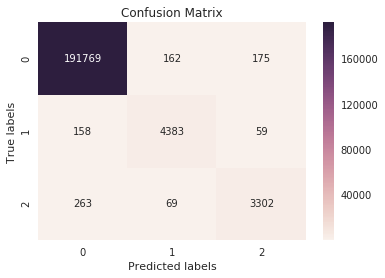

In [33]:
print(grid_sclf.best_estimator_)
print(grid_sclf.best_params_)
print('...................................................................\n\n')

#Prediction
y_predict = grid_sclf.predict(x_test_std)

print('Accuracy of KNN Model: {}\n\n' .format((accuracy_score(y_test,y_predict))))

#generate and plot confusion matrix
dsvm_cm = confusion_matrix(y_test,y_predict)

ax= sns.heatmap(dsvm_cm, annot=True, fmt="d")
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

#Classification Report 
target_names = ['Normal', 'Pre-seizure', 'Seizure']

#print(classification_report(y_test, y_predict, digits=4, target_names=target_names))
print(classification_report_imbalanced(y_test, y_predict, target_names=target_names, digits=4))

print('....................................................................\n\n')

#micro recall, precesion, specificity
for i in [None, 'micro', 'macro', 'weighted']:
    print('sensitivity_specificity {}: {}'.format(i, sensitivity_specificity_support(y_test, y_predict, average=i)))
print('\n')
for i in [None, 'micro', 'macro', 'weighted']:
    print('\ngemetric mean {}: {}'.format(i ,geometric_mean_score(y_test, y_predict, average=i)))
print('\n')
for i in [None, 'micro', 'macro', 'weighted']:
    print('\n\nF1 {}: {}'.format(i, f1_score(y_test, y_predict, average=i)))
print('\n')
for i in [None, 'micro', 'macro', 'weighted']:
    print('\n\nprecision {}: {}'.format(i,precision_score(y_test, y_predict, average='micro')))
print('\n')
for i in [None, 'micro', 'macro', 'weighted']:
    print('\n\nrecall {}: {}'.format(i, recall_score(y_test, y_predict, average='micro')))

### chb02 completed

In [3]:
lebaledCSVFilePath = '/home/mirwais/notebooks/paper_3/data/lebaled/chb02_time_freq_segments.csv'
df = pd.read_csv(lebaledCSVFilePath)
df.columns.size

44

In [4]:
df["sz"].value_counts()

0    122153
2      2047
Name: sz, dtype: int64

In [5]:
# With F1 Score
x = df.drop(['sz','recordingID','Unnamed: 0','time','delta_data', 'theta_data', 'alpha_data', 'beta_data'], axis=1)
#x = featuresUnstack.drop(['sz'], axis=1)
y = df['sz']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=random_state)

#dissimilar scales of data, StandardScaler should be used
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)
cv = StratifiedKFold(n_splits = 10, shuffle=True, random_state = random_state)

clf = KNeighborsClassifier(metric='minkowski', p=2)

params = {'n_neighbors': list(range(3,7))
         }

grid_sclf = GridSearchCV(estimator = clf, param_grid = params, cv = cv, n_jobs=-1, scoring='f1_weighted', verbose=4)
grid_sclf.fit(x_train_std, y_train)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
[CV] n_neighbors=3 ...................................................
[CV] n_neighbors=3 ...................................................
[CV] n_neighbors=3 ...................................................
[CV] n_neighbors=3 ...................................................
[CV] n_neighbors=3 ...................................................
[CV] n_neighbors=3 ...................................................
[CV] n_neighbors=3 ...................................................
[CV] n_neighbors=3 ...................................................
[CV] .......... n_neighbors=3, score=0.9804781386770431, total= 1.6min
[CV] n_neighbors=3 ...................................................
[CV] .......... n_neighbors=3, score=0.9790386015164292, total= 1.8min
[CV] n_neighbors=3 ...................................................
[CV] .......... n_neighbors=3, score=0.9805349271675552, total= 1.9min
[CV] n_neighbors

[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 31.9min


[CV] .......... n_neighbors=3, score=0.9801581474926856, total= 1.9min
[CV] n_neighbors=4 ...................................................
[CV] .......... n_neighbors=4, score=0.9781579507768421, total= 1.9min
[CV] n_neighbors=4 ...................................................
[CV] .......... n_neighbors=4, score=0.9803840107425081, total= 1.9min
[CV] n_neighbors=4 ...................................................
[CV] ........... n_neighbors=4, score=0.980364391716837, total= 1.9min
[CV] n_neighbors=5 ...................................................
[CV] .......... n_neighbors=4, score=0.9796792462374795, total= 2.0min
[CV] n_neighbors=5 ...................................................
[CV] .......... n_neighbors=4, score=0.9795997875128174, total= 2.0min
[CV] n_neighbors=5 ...................................................
[CV] .......... n_neighbors=4, score=0.9810603844702704, total= 2.0min
[CV] n_neighbors=5 ...................................................
[CV] .

[Parallel(n_jobs=-1)]: Done  36 out of  40 | elapsed: 97.0min remaining: 10.8min


[CV] ........... n_neighbors=6, score=0.978052854598545, total= 2.1min
[CV] .......... n_neighbors=6, score=0.9799191659781004, total= 2.2min
[CV] ........... n_neighbors=6, score=0.981224834188357, total= 2.1min
[CV] .......... n_neighbors=6, score=0.9795360403793518, total= 2.2min


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 100.3min finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=2018, shuffle=True),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [3, 4, 5, 6]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='f1_weighted',
       verbose=4)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
{'n_neighbors': 5}
...................................................................


Accuracy of KNN Model: 0.9849973161567365


                   pre       rec       spe        f1       geo       iba       sup

     Normal     0.9858    0.9992    0.1330    0.9924    0.8444    0.7317     36651
Pre-seizure     0.7232    0.1330    0.9992    0.2247    0.8444    0.6942       609

avg / total     0.9815    0.9850    0.1472    0.9799    0.8444    0.7310     37260

....................................................................


sensitivity_specificity None: (array([0.99915418, 0.13300493]), array([0.13300493, 0.99915418]), array([36651,   609]))
sensitivity_specificity micro: (0.9849973161567365, 0.9849973161567365, None)
sensitivity_specificity macro: (0.5660795550844183, 0.5660795550844183, None)
sensitivity_specifici

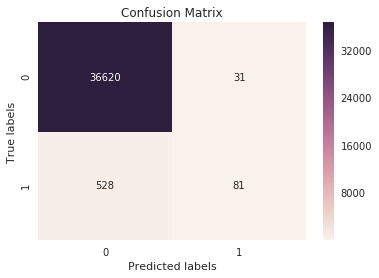

In [6]:
print(grid_sclf.best_estimator_)
print(grid_sclf.best_params_)
print('...................................................................\n\n')

#Prediction
y_predict = grid_sclf.predict(x_test_std)

print('Accuracy of KNN Model: {}\n\n' .format((accuracy_score(y_test,y_predict))))

#generate and plot confusion matrix
dsvm_cm = confusion_matrix(y_test,y_predict)

ax= sns.heatmap(dsvm_cm, annot=True, fmt="d")
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

#Classification Report 
target_names = ['Normal', 'Pre-seizure', 'Seizure']

#print(classification_report(y_test, y_predict, digits=4, target_names=target_names))
print(classification_report_imbalanced(y_test, y_predict, target_names=target_names, digits=4))

print('....................................................................\n\n')

#micro recall, precesion, specificity
for i in [None, 'micro', 'macro', 'weighted']:
    print('sensitivity_specificity {}: {}'.format(i, sensitivity_specificity_support(y_test, y_predict, average=i)))
print('\n')
for i in [None, 'micro', 'macro', 'weighted']:
    print('\ngemetric mean {}: {}'.format(i ,geometric_mean_score(y_test, y_predict, average=i)))
print('\n')
for i in [None, 'micro', 'macro', 'weighted']:
    print('\n\nF1 {}: {}'.format(i, f1_score(y_test, y_predict, average=i)))
print('\n')
for i in [None, 'micro', 'macro', 'weighted']:
    print('\n\nprecision {}: {}'.format(i,precision_score(y_test, y_predict, average='micro')))
print('\n')
for i in [None, 'micro', 'macro', 'weighted']:
    print('\n\nrecall {}: {}'.format(i, recall_score(y_test, y_predict, average='micro')))

### chb03 completed

In [2]:
lebaledCSVFilePath = '/home/mirwais/notebooks/paper_3/data/lebaled/chb03_time_freq_segments.csv'
df = pd.read_csv(lebaledCSVFilePath)
df.columns.size

44

In [3]:
df["sz"].value_counts()

0    285016
2      4784
Name: sz, dtype: int64

In [4]:
# With F1 Score
x = df.drop(['sz','recordingID','Unnamed: 0','time','delta_data', 'theta_data', 'alpha_data', 'beta_data'], axis=1)
#x = featuresUnstack.drop(['sz'], axis=1)
y = df['sz']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=random_state)

#dissimilar scales of data, StandardScaler should be used
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)
cv = StratifiedKFold(n_splits = 10, shuffle=True, random_state = random_state)

clf = KNeighborsClassifier(metric='minkowski', p=2)

params = {'n_neighbors': list(range(5,6))
         }

grid_sclf = GridSearchCV(estimator = clf, param_grid = params, cv = cv, n_jobs=-1, scoring='f1_weighted', verbose=4)
grid_sclf.fit(x_train_std, y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV] n_neighbors=5 ...................................................
[CV] n_neighbors=5 ...................................................
[CV] n_neighbors=5 ...................................................
[CV] n_neighbors=5 ...................................................
[CV] n_neighbors=5 ...................................................
[CV] n_neighbors=5 ...................................................
[CV] n_neighbors=5 ...................................................
[CV] n_neighbors=5 ...................................................
[CV] .......... n_neighbors=5, score=0.9820321917412953, total= 8.5min
[CV] n_neighbors=5 ...................................................
[CV] .......... n_neighbors=5, score=0.9832438050020973, total= 8.6min
[CV] n_neighbors=5 ...................................................
[CV] .......... n_neighbors=5, score=0.9825287808832543, total= 8.6min
[CV] .......... 

[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed: 88.3min remaining: 132.4min


[CV] .......... n_neighbors=5, score=0.9849584080768998, total= 8.6min
[CV] .......... n_neighbors=5, score=0.9836337220877477, total= 8.6min
[CV] .......... n_neighbors=5, score=0.9832404574512054, total= 8.6min


[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed: 89.7min remaining: 38.4min


[CV] ........... n_neighbors=5, score=0.982172225391076, total= 8.8min
[CV] .......... n_neighbors=5, score=0.9831213400526548, total= 6.8min
[CV] .......... n_neighbors=5, score=0.9851523740035623, total= 6.6min


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 149.9min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 149.9min finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=2018, shuffle=True),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [5]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='f1_weighted',
       verbose=4)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
{'n_neighbors': 5}
...................................................................


Accuracy of KNN Model: 0.985829307568438


                   pre       rec       spe        f1       geo       iba       sup

     Normal     0.9885    0.9972    0.2987    0.9928    0.7947    0.6537     85524
Pre-seizure     0.6390    0.2987    0.9972    0.4071    0.7947    0.6095      1416

avg / total     0.9828    0.9858    0.3101    0.9833    0.7947    0.6530     86940

....................................................................


sensitivity_specificity None: (array([0.99720546, 0.29872881]), array([0.29872881, 0.99720546]), array([85524,  1416]))
sensitivity_specificity micro: (0.985829307568438, 0.985829307568438, None)
sensitivity_specificity macro: (0.6479671381766958, 0.6479671381766958, None)
sensitivity_specificity 

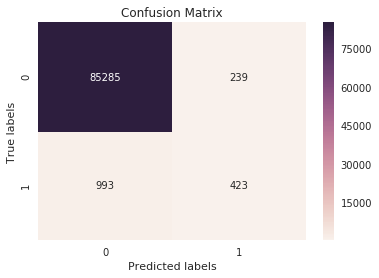

In [5]:
print(grid_sclf.best_estimator_)
print(grid_sclf.best_params_)
print('...................................................................\n\n')

#Prediction
y_predict = grid_sclf.predict(x_test_std)

print('Accuracy of KNN Model: {}\n\n' .format((accuracy_score(y_test,y_predict))))

#generate and plot confusion matrix
dsvm_cm = confusion_matrix(y_test,y_predict)

ax= sns.heatmap(dsvm_cm, annot=True, fmt="d")
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

#Classification Report 
target_names = ['Normal', 'Pre-seizure', 'Seizure']

#print(classification_report(y_test, y_predict, digits=4, target_names=target_names))
print(classification_report_imbalanced(y_test, y_predict, target_names=target_names, digits=4))

print('....................................................................\n\n')

#micro recall, precesion, specificity
for i in [None, 'micro', 'macro', 'weighted']:
    print('sensitivity_specificity {}: {}'.format(i, sensitivity_specificity_support(y_test, y_predict, average=i)))
print('\n')
for i in [None, 'micro', 'macro', 'weighted']:
    print('\ngemetric mean {}: {}'.format(i ,geometric_mean_score(y_test, y_predict, average=i)))
print('\n')
for i in [None, 'micro', 'macro', 'weighted']:
    print('\n\nF1 {}: {}'.format(i, f1_score(y_test, y_predict, average=i)))
print('\n')
for i in [None, 'micro', 'macro', 'weighted']:
    print('\n\nprecision {}: {}'.format(i,precision_score(y_test, y_predict, average='micro')))
print('\n')
for i in [None, 'micro', 'macro', 'weighted']:
    print('\n\nrecall {}: {}'.format(i, recall_score(y_test, y_predict, average='micro')))

### 1. chb04 completed

In [7]:
lebaledCSVFilePath = '/home/mirwais/notebooks/paper_3/data/lebaled/chb04_time_freq_segments.csv'
df = pd.read_csv(lebaledCSVFilePath)
df.columns.size

44

In [8]:
df["sz"].value_counts()

0    165002
2       575
Name: sz, dtype: int64

In [4]:
# With F1 Score
x = df.drop(['sz','recordingID','Unnamed: 0','time','delta_data', 'theta_data', 'alpha_data', 'beta_data'], axis=1)
#x = featuresUnstack.drop(['sz'], axis=1)
y = df['sz']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=random_state)

#dissimilar scales of data, StandardScaler should be used
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)
cv = StratifiedKFold(n_splits = 10, shuffle=True, random_state = random_state)

clf = KNeighborsClassifier(metric='minkowski', p=2)

params = {'n_neighbors': list(range(5,6))
         } 

grid_sclf = GridSearchCV(estimator = clf, param_grid = params, cv = cv, n_jobs=-1, scoring='f1_weighted', verbose=4)
grid_sclf.fit(x_train_std, y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV] n_neighbors=5 ...................................................
[CV] n_neighbors=5 ...................................................
[CV] n_neighbors=5 ...................................................
[CV] n_neighbors=5 ...................................................
[CV] n_neighbors=5 ...................................................
[CV] n_neighbors=5 ...................................................
[CV] n_neighbors=5 ...................................................
[CV] n_neighbors=5 ...................................................


/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/anaconda3/lib/python3.6/s

[CV] .......... n_neighbors=5, score=0.9948265524270188, total=  58.5s
[CV] n_neighbors=5 ...................................................
[CV] .......... n_neighbors=5, score=0.9949553808238417, total=  59.2s
[CV] n_neighbors=5 ...................................................
[CV] .......... n_neighbors=5, score=0.9948265524270188, total=  59.8s
[CV] .......... n_neighbors=5, score=0.9949553808238417, total=  59.1s


[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:  9.5min remaining: 14.3min


[CV] .......... n_neighbors=5, score=0.9949553808238417, total=  60.0s
[CV] .......... n_neighbors=5, score=0.9948265524270188, total=  58.6s
[CV] .......... n_neighbors=5, score=0.9948265524270188, total= 1.0min


[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:  9.6min remaining:  4.1min


[CV] .......... n_neighbors=5, score=0.9949553808238417, total=  60.0s


/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV] .......... n_neighbors=5, score=0.9949549457752072, total=  46.1s
[CV] .......... n_neighbors=5, score=0.9949553808238417, total=  46.5s


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 16.6min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 16.6min finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=2018, shuffle=True),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [5]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='f1_weighted',
       verbose=4)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
{'n_neighbors': 5}
...................................................................


Accuracy of KNN Model: 0.9963965052139953




/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1428: UserWarning: labels size, 2, does not match size of target_names, 3
  .format(len(labels), len(target_names))


             precision    recall  f1-score   support

     Normal     0.9964    1.0000    0.9982     49493
Pre-seizure     1.0000    0.0110    0.0219       181

avg / total     0.9964    0.9964    0.9946     49674

                   pre       rec       spe        f1       geo       iba       sup

     Normal     0.9964    1.0000    0.0110    0.9982    0.9982    0.9960     49493
Pre-seizure     1.0000    0.0110    1.0000    0.0219    0.9982    0.9968       181

avg / total     0.9964    0.9964    0.0147    0.9946    0.9982    0.9960     49674

....................................................................


sensitivity_specificity None: (array([1.        , 0.01104972]), array([0.01104972, 1.        ]), array([49493,   181]))
sensitivity_specificity micro: (0.9963965052139953, 0.9963965052139953, None)
sensitivity_specificity macro: (0.505524861878453, 0.505524861878453, None)
sensitivity_specificity weighted: (0.9963965052139953, 0.014653218542910828, None)



gemetric mean None:

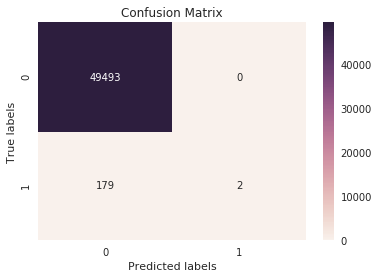

In [6]:
print(grid_sclf.best_estimator_)
print(grid_sclf.best_params_)
print('...................................................................\n\n')

#Prediction
y_predict = grid_sclf.predict(x_test_std)

print('Accuracy of KNN Model: {}\n\n' .format((accuracy_score(y_test,y_predict))))

#generate and plot confusion matrix
dsvm_cm = confusion_matrix(y_test,y_predict)

ax= sns.heatmap(dsvm_cm, annot=True, fmt="d")
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

#Classification Report 
target_names = ['Normal', 'Pre-seizure', 'Seizure']

#print(classification_report(y_test, y_predict, digits=4, target_names=target_names))
print(classification_report_imbalanced(y_test, y_predict, target_names=target_names, digits=4))

print('....................................................................\n\n')

#micro recall, precesion, specificity
for i in [None, 'micro', 'macro', 'weighted']:
    print('sensitivity_specificity {}: {}'.format(i, sensitivity_specificity_support(y_test, y_predict, average=i)))
print('\n')
for i in [None, 'micro', 'macro', 'weighted']:
    print('\ngemetric mean {}: {}'.format(i ,geometric_mean_score(y_test, y_predict, average=i)))
print('\n')
for i in [None, 'micro', 'macro', 'weighted']:
    print('\n\nF1 {}: {}'.format(i, f1_score(y_test, y_predict, average=i)))
print('\n')
for i in [None, 'micro', 'macro', 'weighted']:
    print('\n\nprecision {}: {}'.format(i,precision_score(y_test, y_predict, average='micro')))
print('\n')
for i in [None, 'micro', 'macro', 'weighted']:
    print('\n\nrecall {}: {}'.format(i, recall_score(y_test, y_predict, average='micro')))

In [19]:
# Over-sampling using SMOTE
from collections import Counter
from imblearn.over_sampling import SMOTE 

x = df.drop(['sz','recordingID','Unnamed: 0','time','delta_data', 'theta_data', 'alpha_data', 'beta_data'], axis=1)
#x = featuresUnstack.drop(['sz'], axis=1)
y = df['sz']

sm = SMOTE(random_state=42,ratio={2:49493})
X_res, y_res = sm.fit_sample(x, y)

print('Resampled dataset shape {}'.format(Counter(y_res)))

Resampled dataset shape Counter({0: 165002, 2: 49493})


In [15]:
x_train, x_test, y_train, y_test = train_test_split(X_res, y_res, train_size=0.7, test_size=0.3, random_state=random_state)

#dissimilar scales of data, StandardScaler should be used
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)
cv = StratifiedKFold(n_splits = 10, shuffle=True, random_state = random_state)

clf = KNeighborsClassifier(metric='minkowski', p=2)

params = {'n_neighbors': list(range(5,6))
         } 

grid_sclf = GridSearchCV(estimator = clf, param_grid = params, cv = cv, n_jobs=-1, scoring='f1_weighted', verbose=4)
grid_sclf.fit(x_train_std, y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV] n_neighbors=5 ...................................................
[CV] n_neighbors=5 ...................................................
[CV] n_neighbors=5 ...................................................
[CV] n_neighbors=5 ...................................................
[CV] n_neighbors=5 ...................................................
[CV] n_neighbors=5 ...................................................
[CV] n_neighbors=5 ...................................................
[CV] n_neighbors=5 ...................................................
[CV] .......... n_neighbors=5, score=0.9652449827894113, total= 1.6min
[CV] n_neighbors=5 ...................................................
[CV] .......... n_neighbors=5, score=0.9661576408715342, total= 1.7min
[CV] n_neighbors=5 ...................................................
[CV] .......... n_neighbors=5, score=0.9653025562137523, total= 1.7min
[CV] .......... 

[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed: 16.0min remaining: 24.0min


[CV] .......... n_neighbors=5, score=0.9639595267583498, total= 1.7min
[CV] .......... n_neighbors=5, score=0.9623165683774798, total= 1.7min
[CV] .......... n_neighbors=5, score=0.9650224319649592, total= 1.7min


[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed: 16.1min remaining:  6.9min


[CV] .......... n_neighbors=5, score=0.9647566126282354, total= 1.7min
[CV] .......... n_neighbors=5, score=0.9659214269962701, total= 1.3min
[CV] .......... n_neighbors=5, score=0.9630799539708002, total= 1.6min


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 28.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 28.1min finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=2018, shuffle=True),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [5]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='f1_weighted',
       verbose=4)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
{'n_neighbors': 5}
...................................................................


Accuracy of KNN Model: 0.9645702722723084


                   pre       rec       spe        f1       geo       iba       sup

     Normal     0.9978    0.9625    0.9823    0.9798    0.8677    0.7712     49536
Pre-seizure     0.7545    0.9823    0.9625    0.8534    0.8677    0.7345      5813

avg / total     0.9723    0.9646    0.9802    0.9666    0.8677    0.7673     55349

....................................................................


sensitivity_specificity None: (array([0.96249193, 0.98228109]), array([0.98228109, 0.96249193]), array([49536,  5813]))
sensitivity_specificity micro: (0.9645702722723084, 0.9645702722723084, None)
sensitivity_specificity macro: (0.9723865095820159, 0.9723865095820159, None)
sensitivity_specifici

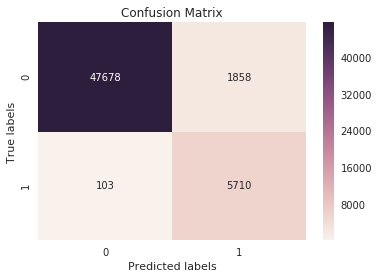

In [16]:
print(grid_sclf.best_estimator_)
print(grid_sclf.best_params_)
print('...................................................................\n\n')

#Prediction
y_predict = grid_sclf.predict(x_test_std)

print('Accuracy of KNN Model: {}\n\n' .format((accuracy_score(y_test,y_predict))))

#generate and plot confusion matrix
dsvm_cm = confusion_matrix(y_test,y_predict)

ax= sns.heatmap(dsvm_cm, annot=True, fmt="d")
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

#Classification Report 
target_names = ['Normal', 'Seizure']

#print(classification_report(y_test, y_predict, digits=4, target_names=target_names))
print(classification_report_imbalanced(y_test, y_predict, target_names=target_names, digits=4))

print('....................................................................\n\n')

#micro recall, precesion, specificity
for i in [None, 'micro', 'macro', 'weighted']:
    print('sensitivity_specificity {}: {}'.format(i, sensitivity_specificity_support(y_test, y_predict, average=i)))
print('\n')
for i in [None, 'micro', 'macro', 'weighted']:
    print('\ngemetric mean {}: {}'.format(i ,geometric_mean_score(y_test, y_predict, average=i)))
print('\n')
for i in [None, 'micro', 'macro', 'weighted']:
    print('\n\nF1 {}: {}'.format(i, f1_score(y_test, y_predict, average=i)))
print('\n')
for i in [None, 'micro', 'macro', 'weighted']:
    print('\n\nprecision {}: {}'.format(i,precision_score(y_test, y_predict, average='micro')))
print('\n')
for i in [None, 'micro', 'macro', 'weighted']:
    print('\n\nrecall {}: {}'.format(i, recall_score(y_test, y_predict, average='micro')))

### chb05 completed

In [20]:
lebaledCSVFilePath = '/home/mirwais/notebooks/paper_3/data/lebaled/chb05_time_freq_segments.csv'
df = pd.read_csv(lebaledCSVFilePath)
df.columns.size

44

In [27]:
normal, seizure = df["sz"].value_counts()
print('Normal = {}\n Seziure = {}'.format(normal, seizure))

Normal = 200468
 Seziure = 6532


In [22]:
# With F1 Score
x = df.drop(['sz','recordingID','Unnamed: 0','time','delta_data', 'theta_data', 'alpha_data', 'beta_data'], axis=1)
#x = featuresUnstack.drop(['sz'], axis=1)
y = df['sz']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=random_state)

#dissimilar scales of data, StandardScaler should be used
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)
cv = StratifiedKFold(n_splits = 10, shuffle=True, random_state = random_state)

clf = KNeighborsClassifier(metric='minkowski', p=2)

params = {'n_neighbors': list(range(5,6))
         } 

grid_sclf = GridSearchCV(estimator = clf, param_grid = params, cv = cv, n_jobs=-1, scoring='f1_weighted', verbose=4)
grid_sclf.fit(x_train_std, y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV] n_neighbors=5 ...................................................
[CV] n_neighbors=5 ...................................................
[CV] n_neighbors=5 ...................................................
[CV] n_neighbors=5 ...................................................
[CV] n_neighbors=5 ...................................................
[CV] n_neighbors=5 ...................................................
[CV] n_neighbors=5 ...................................................
[CV] n_neighbors=5 ...................................................
[CV] .......... n_neighbors=5, score=0.9866825272675512, total= 5.2min
[CV] n_neighbors=5 ...................................................
[CV] .......... n_neighbors=5, score=0.9876451638444568, total= 5.4min
[CV] n_neighbors=5 ...................................................
[CV] ........... n_neighbors=5, score=0.988976822831282, total= 5.3min
[CV] .......... 

[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed: 54.0min remaining: 80.9min


[CV] .......... n_neighbors=5, score=0.9883942670914855, total= 5.3min
[CV] .......... n_neighbors=5, score=0.9884363482610312, total= 5.4min
[CV] .......... n_neighbors=5, score=0.9874809882750357, total= 5.4min


[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed: 54.2min remaining: 23.2min


[CV] .......... n_neighbors=5, score=0.9889678259766453, total= 5.4min
[CV] .......... n_neighbors=5, score=0.9871279227475982, total= 3.5min
[CV] .......... n_neighbors=5, score=0.9882949381534544, total= 3.5min


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 90.9min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 90.9min finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=2018, shuffle=True),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [5]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='f1_weighted',
       verbose=4)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
{'n_neighbors': 5}
...................................................................


Accuracy of KNN Model: 0.9889533011272141


                   pre       rec       spe        f1       geo       iba       sup

     Normal     0.9903    0.9984    0.6928    0.9943    0.9614    0.9296     60176
Pre-seizure     0.9335    0.6928    0.9984    0.7953    0.9614    0.9191      1924

avg / total     0.9885    0.9890    0.7023    0.9882    0.9614    0.9293     62100

....................................................................


sensitivity_specificity None: (array([0.9984213 , 0.69282744]), array([0.69282744, 0.9984213 ]), array([60176,  1924]))
sensitivity_specificity micro: (0.9889533011272141, 0.9889533011272141, None)
sensitivity_specificity macro: (0.845624370177348, 0.845624370177348, None)
sensitivity_specificity

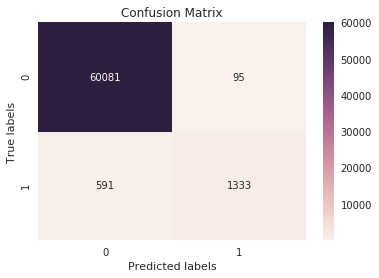

In [23]:
print(grid_sclf.best_estimator_)
print(grid_sclf.best_params_)
print('...................................................................\n\n')

#Prediction
y_predict = grid_sclf.predict(x_test_std)

print('Accuracy of KNN Model: {}\n\n' .format((accuracy_score(y_test,y_predict))))

#generate and plot confusion matrix
dsvm_cm = confusion_matrix(y_test,y_predict)

ax= sns.heatmap(dsvm_cm, annot=True, fmt="d")
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

#Classification Report 
target_names = ['Normal', 'Pre-seizure', 'Seizure']

#print(classification_report(y_test, y_predict, digits=4, target_names=target_names))
print(classification_report_imbalanced(y_test, y_predict, target_names=target_names, digits=4))

print('....................................................................\n\n')

#micro recall, precesion, specificity
for i in [None, 'micro', 'macro', 'weighted']:
    print('sensitivity_specificity {}: {}'.format(i, sensitivity_specificity_support(y_test, y_predict, average=i)))
print('\n')
for i in [None, 'micro', 'macro', 'weighted']:
    print('\ngemetric mean {}: {}'.format(i ,geometric_mean_score(y_test, y_predict, average=i)))
print('\n')
for i in [None, 'micro', 'macro', 'weighted']:
    print('\n\nF1 {}: {}'.format(i, f1_score(y_test, y_predict, average=i)))
print('\n')
for i in [None, 'micro', 'macro', 'weighted']:
    print('\n\nprecision {}: {}'.format(i,precision_score(y_test, y_predict, average='micro')))
print('\n')
for i in [None, 'micro', 'macro', 'weighted']:
    print('\n\nrecall {}: {}'.format(i, recall_score(y_test, y_predict, average='micro')))

In [29]:
# Over-sampling using SMOTE
from collections import Counter
from imblearn.over_sampling import SMOTE 

x = df.drop(['sz','recordingID','Unnamed: 0','time','delta_data', 'theta_data', 'alpha_data', 'beta_data'], axis=1)
#x = featuresUnstack.drop(['sz'], axis=1)
y = df['sz']

upsampling_rate = (normal*30)/100

sm = SMOTE(random_state=42,ratio={2:int(upsampling_rate)})
x_res, y_res = sm.fit_sample(x, y)

print('Resampled dataset shape {}'.format(Counter(y_res)))

Resampled dataset shape Counter({0: 200468, 2: 60140})


In [30]:
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, train_size=0.7, test_size=0.3, random_state=random_state)

#dissimilar scales of data, StandardScaler should be used
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)
cv = StratifiedKFold(n_splits = 10, shuffle=True, random_state = random_state)

clf = KNeighborsClassifier(metric='minkowski', p=2)

params = {'n_neighbors': list(range(5,6))
         } 

grid_sclf = GridSearchCV(estimator = clf, param_grid = params, cv = cv, n_jobs=-1, scoring='f1_weighted', verbose=4)
grid_sclf.fit(x_train_std, y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV] n_neighbors=5 ...................................................
[CV] n_neighbors=5 ...................................................
[CV] n_neighbors=5 ...................................................
[CV] n_neighbors=5 ...................................................
[CV] n_neighbors=5 ...................................................
[CV] n_neighbors=5 ...................................................
[CV] n_neighbors=5 ...................................................
[CV] n_neighbors=5 ...................................................
[CV] .......... n_neighbors=5, score=0.9766372024728038, total= 5.0min
[CV] n_neighbors=5 ...................................................
[CV] .......... n_neighbors=5, score=0.9729079493413829, total= 5.1min
[CV] n_neighbors=5 ...................................................
[CV] .......... n_neighbors=5, score=0.9762694446938202, total= 5.3min
[CV] .......... 

[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed: 52.2min remaining: 78.2min


[CV] .......... n_neighbors=5, score=0.9740095858980331, total= 5.3min
[CV] .......... n_neighbors=5, score=0.9743034164965878, total= 5.3min
[CV] .......... n_neighbors=5, score=0.9735312052492353, total= 5.3min


[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed: 52.3min remaining: 22.4min


[CV] .......... n_neighbors=5, score=0.9728963726072927, total= 5.2min
[CV] .......... n_neighbors=5, score=0.9751349991278607, total= 4.7min
[CV] .......... n_neighbors=5, score=0.9751066788216662, total= 4.3min


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 89.5min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 89.5min finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=2018, shuffle=True),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [5]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='f1_weighted',
       verbose=4)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
{'n_neighbors': 5}
...................................................................


Accuracy of KNN Model: 0.9763247764859369


                   pre       rec       spe        f1       geo       iba       sup

     Normal     0.9951    0.9740    0.9841    0.9844    0.9565    0.9218     60072
    Seizure     0.9194    0.9841    0.9740    0.9506    0.9565    0.9079     18111

avg / total     0.9776    0.9763    0.9818    0.9766    0.9565    0.9186     78183

....................................................................


sensitivity_specificity None: (array([0.97398122, 0.98409806]), array([0.98409806, 0.97398122]), array([60072, 18111]))
sensitivity_specificity micro: (0.9763247764859369, 0.9763247764859369, None)
sensitivity_specificity macro: (0.9790396422421304, 0.9790396422421304, None)
sensitivity_specifici

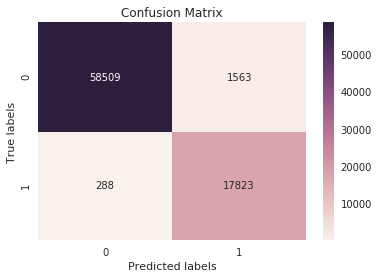

In [31]:
print(grid_sclf.best_estimator_)
print(grid_sclf.best_params_)
print('...................................................................\n\n')

#Prediction
y_predict = grid_sclf.predict(x_test_std)

print('Accuracy of KNN Model: {}\n\n' .format((accuracy_score(y_test,y_predict))))

#generate and plot confusion matrix
dsvm_cm = confusion_matrix(y_test,y_predict)

ax= sns.heatmap(dsvm_cm, annot=True, fmt="d")
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

#Classification Report 
target_names = ['Normal', 'Seizure']

#print(classification_report(y_test, y_predict, digits=4, target_names=target_names))
print(classification_report_imbalanced(y_test, y_predict, target_names=target_names, digits=4))

print('....................................................................\n\n')

#micro recall, precesion, specificity
for i in [None, 'micro', 'macro', 'weighted']:
    print('sensitivity_specificity {}: {}'.format(i, sensitivity_specificity_support(y_test, y_predict, average=i)))
print('\n')
for i in [None, 'micro', 'macro', 'weighted']:
    print('\ngemetric mean {}: {}'.format(i ,geometric_mean_score(y_test, y_predict, average=i)))
print('\n')
for i in [None, 'micro', 'macro', 'weighted']:
    print('\n\nF1 {}: {}'.format(i, f1_score(y_test, y_predict, average=i)))
print('\n')
for i in [None, 'micro', 'macro', 'weighted']:
    print('\n\nprecision {}: {}'.format(i,precision_score(y_test, y_predict, average='micro')))
print('\n')
for i in [None, 'micro', 'macro', 'weighted']:
    print('\n\nrecall {}: {}'.format(i, recall_score(y_test, y_predict, average='micro')))

In [3]:
#Only single channels data T8-P8
lebaledCSVFilePath = '/home/mirwais/notebooks/paper_3/data/single_channel/lebaled/chb01_time_freq_segments.csv'
df = pd.read_csv(lebaledCSVFilePath)
df.columns.size

44

In [4]:
normal, seizure = df["sz"].value_counts()
print('Normal = {}\n Seziure = {}'.format(normal, seizure))

Normal = 12371
 Seziure = 229


In [24]:
# Over-sampling using SMOTE
from collections import Counter
from imblearn.over_sampling import SMOTE 

x = df.drop(['sz','recordingID','Unnamed: 0','time','delta_data', 'theta_data', 'alpha_data', 'beta_data'], axis=1)
#x = featuresUnstack.drop(['sz'], axis=1)
y = df['sz']

upsampling_rate = (normal*50)/100

sm = SMOTE(random_state=42,ratio={2:int(upsampling_rate)})
x_res, y_res = sm.fit_sample(x, y)

print('Resampled dataset shape {}'.format(Counter(y_res)))

Resampled dataset shape Counter({0: 12371, 2: 6185})


In [25]:
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, train_size=0.7, test_size=0.3, random_state=random_state)

#dissimilar scales of data, StandardScaler should be used
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)
cv = StratifiedKFold(n_splits = 10, shuffle=True, random_state = random_state)

clf = KNeighborsClassifier(metric='minkowski', p=2)

params = {'n_neighbors': list(range(2,3))
         }

grid_sclf = GridSearchCV(estimator = clf, param_grid = params, cv = cv, n_jobs=-1, scoring='f1_weighted', verbose=4)
grid_sclf.fit(x_train_std, y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV] n_neighbors=2 ...................................................
[CV] n_neighbors=2 ...................................................
[CV] n_neighbors=2 ...................................................
[CV] n_neighbors=2 ...................................................
[CV] n_neighbors=2 ...................................................
[CV] n_neighbors=2 ...................................................
[CV] n_neighbors=2 ...................................................
[CV] n_neighbors=2 ...................................................
[CV] .......... n_neighbors=2, score=0.9808731693765155, total=   1.6s
[CV] n_neighbors=2 ...................................................
[CV] .......... n_neighbors=2, score=0.9785939521271861, total=   1.4s
[CV] n_neighbors=2 ...................................................
[CV] .......... n_neighbors=2, score=0.9695070666053102, total=   1.5s
[CV] .......... 

[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:   13.3s remaining:   20.0s


[CV] ............ n_neighbors=2, score=0.97101836730408, total=   1.6s
[CV] .......... n_neighbors=2, score=0.9687884467530515, total=   1.6s


[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:   13.8s remaining:    5.9s


[CV] .......... n_neighbors=2, score=0.9717875609844068, total=   1.7s
[CV] .......... n_neighbors=2, score=0.9717654572620261, total=   1.0s
[CV] .......... n_neighbors=2, score=0.9755523899048043, total=   1.4s


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   20.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   20.0s finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=2018, shuffle=True),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [2]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='f1_weighted',
       verbose=4)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')
{'n_neighbors': 2}
...................................................................


Accuracy of KNN Model: 0.9759295850547871


                   pre       rec       spe        f1       geo       iba       sup

     Normal     0.9997    0.9643    0.9995    0.9817    0.9656    0.9387      3723
    Seizure     0.9327    0.9995    0.9643    0.9649    0.9656    0.9262      1844

avg / total     0.9775    0.9759    0.9878    0.9761    0.9656    0.9345      5567

....................................................................


sensitivity_specificity None: (array([0.96427612, 0.9994577 ]), array([0.9994577 , 0.96427612]), array([3723, 1844]))
sensitivity_specificity micro: (0.9759295850547871, 0.9759295850547871, None)
sensitivity_specificity macro: (0.9818669110291132, 0.9818669110291132, None)
sensitivity_specificity

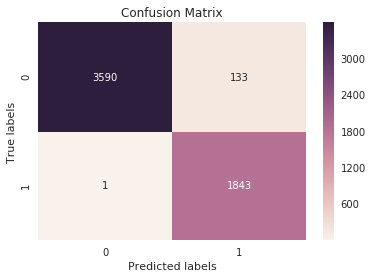

In [26]:
print(grid_sclf.best_estimator_)
print(grid_sclf.best_params_)
print('...................................................................\n\n')

#Prediction
y_predict = grid_sclf.predict(x_test_std)

print('Accuracy of KNN Model: {}\n\n' .format((accuracy_score(y_test,y_predict))))

#generate and plot confusion matrix
dsvm_cm = confusion_matrix(y_test,y_predict)

ax= sns.heatmap(dsvm_cm, annot=True, fmt="d")
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

#Classification Report 
target_names = ['Normal', 'Seizure']

#print(classification_report(y_test, y_predict, digits=4, target_names=target_names))
print(classification_report_imbalanced(y_test, y_predict, target_names=target_names, digits=4))

print('....................................................................\n\n')

#micro recall, precesion, specificity
for i in [None, 'micro', 'macro', 'weighted']:
    print('sensitivity_specificity {}: {}'.format(i, sensitivity_specificity_support(y_test, y_predict, average=i)))
print('\n')
for i in [None, 'micro', 'macro', 'weighted']:
    print('\ngemetric mean {}: {}'.format(i ,geometric_mean_score(y_test, y_predict, average=i)))
print('\n')
for i in [None, 'micro', 'macro', 'weighted']:
    print('\n\nF1 {}: {}'.format(i, f1_score(y_test, y_predict, average=i)))
print('\n')
for i in [None, 'micro', 'macro', 'weighted']:
    print('\n\nprecision {}: {}'.format(i,precision_score(y_test, y_predict, average='micro')))
print('\n')
for i in [None, 'micro', 'macro', 'weighted']:
    print('\n\nrecall {}: {}'.format(i, recall_score(y_test, y_predict, average='micro')))